In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import *
import pandas as pd

In [3]:
def get_stats(root_uuid, prefix='tst', model_name='rvce'):
    table = pd.read_csv(f'outputs/{root_uuid}/{prefix}_{model_name}_output.csv')
    rvce = table['rvce: n_counts'][:-1].to_numpy().astype(float)
    stats = {}
    stats['rvce'] = rvce
    stats['<10%'] = np.mean(rvce < 0.1)
    stats['<5%'] = np.mean(rvce < 0.05)
    stats['Q1'] = np.quantile(rvce, 0.25)
    stats['mean'] = np.mean(rvce)
    stats['std'] = np.std(rvce)
    stats['median'] = np.median(rvce)
    stats['Q3'] = np.quantile(rvce, 0.75)
    return stats


def plot(root_uuids):
    rvces = []
    names = []

    for root_uuid, prefix, model_name, name in root_uuids:
        stats = get_stats(root_uuid, prefix, model_name)
        rvce = stats['rvce']
        rvces.append(rvce)
        names.append(name)

    np.random.seed(41)
    plt.figure(figsize=(7, 5))
    for i, points in enumerate(rvces):
        xs = np.random.normal(i + 1, 0.04, len(points))
        plt.scatter(xs, points, alpha=0.3)

    plt.ylabel('RVCE')
    # plt.title('RVCE of different models')
    plt.grid()

    plt.gca().set_xticklabels(names, rotation=45)

    meanprops = dict(marker='x', markeredgecolor='black', markerfacecolor='firebrick')

    plt.boxplot(rvces, showmeans=True, showfliers=False, notch=True, meanprops=meanprops, medianprops={'c': 'k'});
    plt.tight_layout()

(0.0, 0.3)

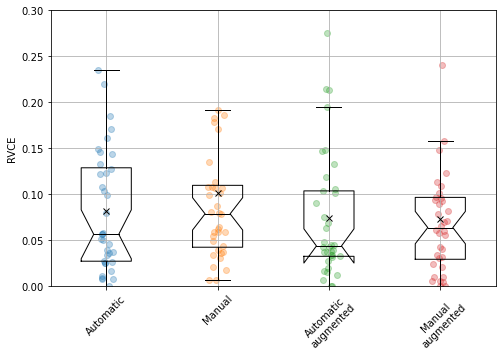

In [12]:
# Manual annotaions
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Automatic'),
    ('033_RX100_resized_128_manual_counts', 'tst', 'rvce', 'Manual'),

    ('034_RX100_resized_128_augmented', 'tst', 'rvce', 'Automatic\naugmented'),
    ('034_RX100_resized_128_augmented_manual_counts', 'tst', 'rvce', 'Manual\naugmented'),
]
plot(root_uuids)
plt.ylim(0, 0.3)

(0.0, 0.3)

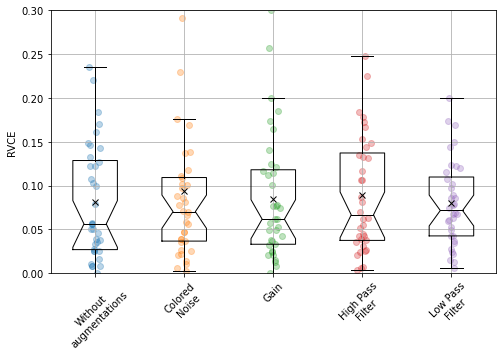

In [12]:
# Audio augmentations
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Without\naugmentations'),
    ('032_RX100_resized_128_random_colored_noise', 'tst', 'rvce', 'Colored\nNoise'),
    ('032_RX100_resized_128_random_gain', 'tst', 'rvce', 'Gain'),
    ('032_RX100_resized_128_random_high_pass_filter', 'tst', 'rvce', 'High Pass\nFilter'),
    ('032_RX100_resized_128_random_low_pass_filter', 'tst', 'rvce', 'Low Pass\nFilter'),

    # ('032_RX100_resized_128_random_pitch_shift', 'tst', 'rvce', 'Pitch Shift'),
]
plot(root_uuids)
plt.ylim(0, 0.3)

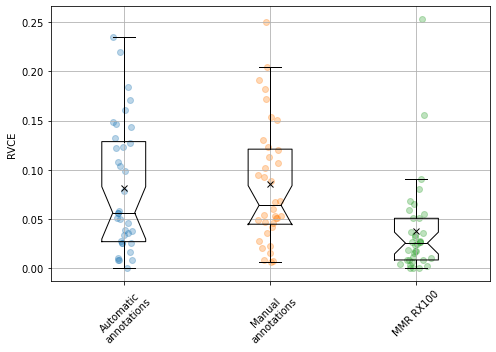

In [11]:
# Manual annotations
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Automatic\nannotations'),
    ('020_RX100_resized_128', 'tst_manual', 'rvce', 'Manual\nannotations'),
    ('000_manual', 'tst', 'rvce', 'MMR RX100'),
    # ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/manual_annotations_boxplot.pdf')

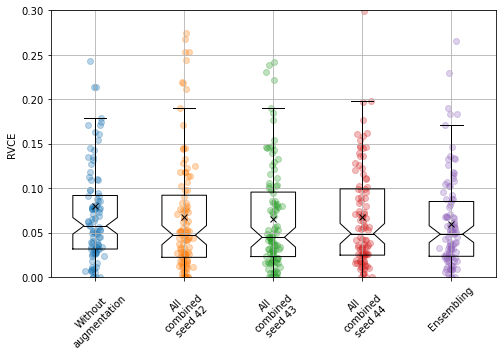

In [9]:
# Bigger dataset, Augmentations
root_uuids = [
    ('029_aligned_resized_128', 'tst', 'rvce', 'Without\naugmentation'),
    ('029_aligned_resized_128_augmentations_all', 'tst', 'rvce', 'All\ncombined\nseed 42'),
    ('029_aligned_resized_128_augmentations_all_seed_43', 'tst', 'rvce', 'All\ncombined\nseed 43'),
    ('029_aligned_resized_128_augmentations_all_seed_44', 'tst', 'rvce', 'All\ncombined\nseed 44'),
    ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
]
plot(root_uuids)
plt.ylim(0, 0.3)
plt.savefig('plots/boxplots/big_dataset_augmentations_boxplot.pdf')

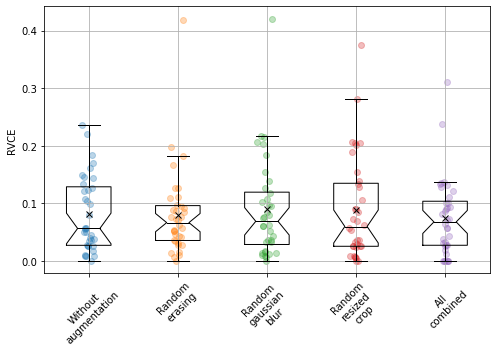

In [24]:
# Augmentations
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Without\naugmentation'),
    ('027_RX100_resized_128_random_erasing', 'tst', 'rvce', 'Random\nerasing'),
    ('027_RX100_resized_128_random_gaussian_blur', 'tst', 'rvce', 'Random\ngaussian\nblur'),
    ('027_RX100_resized_128_random_resized_crop', 'tst', 'rvce', 'Random\nresized\ncrop'),
    ('027_RX100_resized_128_augmentations_all', 'tst', 'rvce', 'All\ncombined'),
    # ('027_RX100_resized_128_augmentations_all', 'tst_doubled', 'rvce', 'All\ncombined'),
    # ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/augmentations_boxplot.pdf')

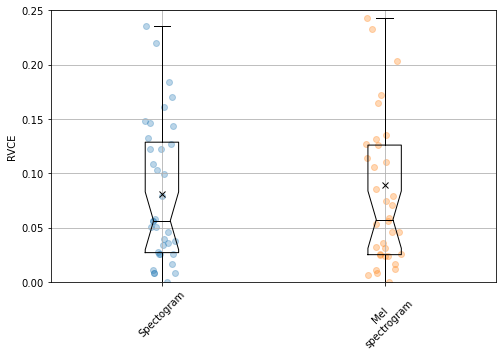

In [9]:
# Devices
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Spectogram'),
    ('026_RX100_resized_128_mel', 'tst', 'rvce', 'Mel\nspectrogram'),
]
plot(root_uuids)
plt.ylim(0, 0.25)
plt.savefig('plots/boxplots/feature_extractor_boxplot.pdf')

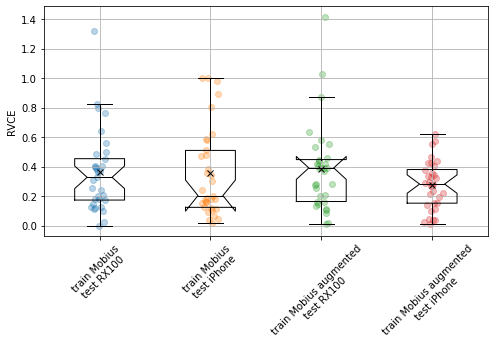

In [31]:
# Cross-device 
root_uuids = [
    # ('024_RX100_smaller_resized_128', 'tst', 'rvce', 'train RX100\ntest RX100'),
    # ('000_cross_device', 'train_RX100_test_Mobius', 'rvce', 'train RX100\ntest Mobius'),
    # ('000_cross_device', 'train_RX100_test_iphone', 'rvce', 'train RX100\ntest iPhone'),
    # ('000_cross_device', 'train_RX100_augmented_test_Mobius', 'rvce', 'train augmented RX100\ntest Mobius'),
    # ('000_cross_device', 'train_RX100_augmented_test_iphone', 'rvce', 'train augmented RX100\ntest iPhone'),

    ('000_cross_device', 'train_Mobius_test_RX100', 'rvce', 'train Mobius\ntest RX100'),
    ('000_cross_device', 'train_Mobius_test_iphone', 'rvce', 'train Mobius\ntest iPhone'),
    ('000_cross_device', 'train_Mobius_augmented_test_RX100', 'rvce', 'train Mobius augmented\ntest RX100'),
    ('000_cross_device', 'train_Mobius_augmented_test_iphone', 'rvce', 'train Mobius augmented\ntest iPhone'),

    
    # ('000_cross_device', 'train_iphone_test_Mobius', 'rvce', 'train iPhone\ntest Mobius'),
    # ('000_cross_device', 'train_iphone_test_RX100', 'rvce', 'train iPhone\ntest RX100'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/cross_device_augmented_boxplot.pdf')

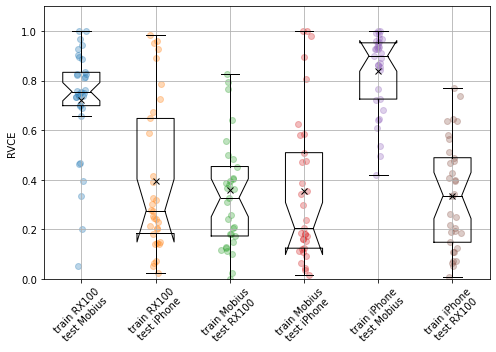

In [7]:
# Cross-device 
root_uuids = [
    # ('024_RX100_smaller_resized_128', 'tst', 'rvce', 'train RX100\ntest RX100'),
    ('000_cross_device', 'train_RX100_test_Mobius', 'rvce', 'train RX100\ntest Mobius'),
    ('000_cross_device', 'train_RX100_test_iphone', 'rvce', 'train RX100\ntest iPhone'),
    ('000_cross_device', 'train_Mobius_test_RX100', 'rvce', 'train Mobius\ntest RX100'),
    ('000_cross_device', 'train_Mobius_test_iphone', 'rvce', 'train Mobius\ntest iPhone'),
    ('000_cross_device', 'train_iphone_test_Mobius', 'rvce', 'train iPhone\ntest Mobius'),
    ('000_cross_device', 'train_iphone_test_RX100', 'rvce', 'train iPhone\ntest RX100'),
]
plot(root_uuids)
plt.ylim(0, 1.1)
plt.savefig('plots/boxplots/cross_device_boxplot.pdf')

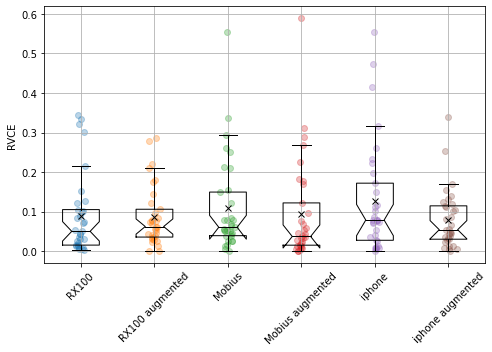

In [28]:
# Devices with augmentations
root_uuids = [
    ('024_RX100_smaller_resized_128', 'tst', 'rvce', 'RX100'),
    ('024_RX100_smaller_resized_128_augmentations', 'tst', 'rvce', 'RX100 augmented'),

    ('024_Mobius_aligned_smaller_resized_128', 'tst', 'rvce', 'Mobius'),
    ('024_Mobius_aligned_smaller_resized_128_augmentations', 'tst', 'rvce', 'Mobius augmented'),
    
    ('024_iphone_aligned_smaller_resized_128', 'tst', 'rvce', 'iphone'),
    ('024_iphone_aligned_smaller_resized_128_augmentations', 'tst', 'rvce', 'iphone augmented'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/devices_augmentations_boxplot.pdf')

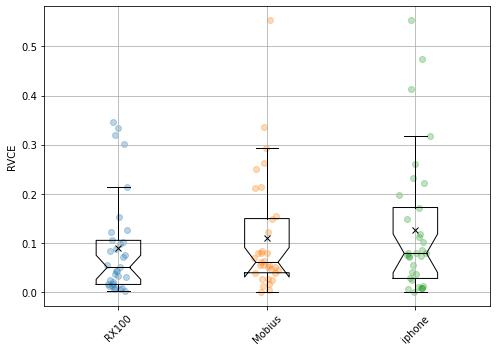

In [11]:
# Devices
root_uuids = [
    ('024_RX100_smaller_resized_128', 'tst', 'rvce', 'RX100'),
    ('024_Mobius_aligned_smaller_resized_128', 'tst', 'rvce', 'Mobius'),
    ('024_iphone_aligned_smaller_resized_128', 'tst', 'rvce', 'iphone'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/devices_boxplot.pdf')

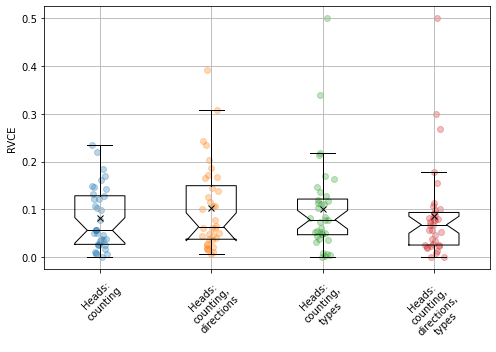

In [13]:
# Multiple heads
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Heads:\ncounting'),

    ('023_RX100_resized_128_directions', 'tst', 'rvce', 'Heads:\ncounting,\ndirections'),
    # ('023_RX100_resized_128_directions', 'tst_structured', 'rvce', 'Heads:\ncounting,\ndirections.\nStructured'),
    
    ('023_RX100_resized_128_types', 'tst', 'rvce', 'Heads:\ncounting,\ntypes'),
    # ('023_RX100_resized_128_types', 'tst_structured', 'rvce', 'Heads:\ncounting,\ntypes.\nStructured'),
    
    ('023_RX100_resized_128_direction_types', 'tst', 'rvce', 'Heads:\ncounting,\ndirections,\ntypes'),
    # ('023_RX100_resized_128_direction_types', 'tst_structured', 'rvce', 'Heads:\ncounting,\ndirections,\ntypes.\nStructured'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/multiple_heads_boxplot.pdf')

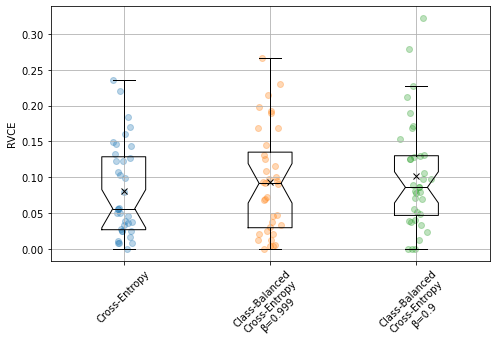

In [7]:
# ClassBalancedCrossEntropy
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'Cross-Entropy'),
    ('021_RX100_resized_128_CBCE_1', 'tst', 'rvce', 'Class-Balanced\nCross-Entropy\nβ=0.999'),
    ('021_RX100_resized_128_CBCE_beta09', 'tst', 'rvce', 'Class-Balanced\nCross-Entropy\nβ=0.9'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/loss_boxplot.pdf')

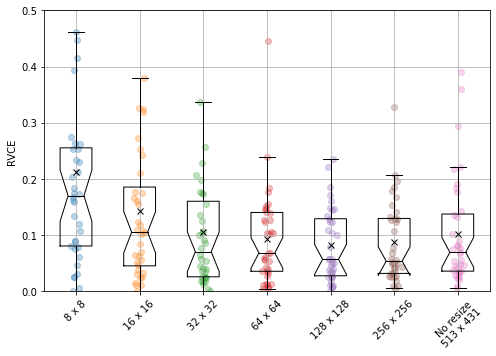

In [7]:
# resize
root_uuids = [
    ('020_RX100_resized_8', 'tst', 'rvce', '8 x 8'),
    ('020_RX100_resized_16', 'tst', 'rvce', '16 x 16'),
    ('020_RX100_resized_32', 'tst', 'rvce', '32 x 32'),
    ('020_RX100_resized_64', 'tst', 'rvce', '64 x 64'),
    ('020_RX100_resized_128', 'tst', 'rvce', '128 x 128'),
    ('020_RX100_resized_256', 'tst', 'rvce', '256 x 256'),
    ('010_eyedea_RX100_3', 'tst', 'rvce', 'No resize\n513 x 431'),
]
plot(root_uuids)
plt.ylim(0, 0.5)
plt.savefig('plots/boxplots/resize_boxplot.pdf')

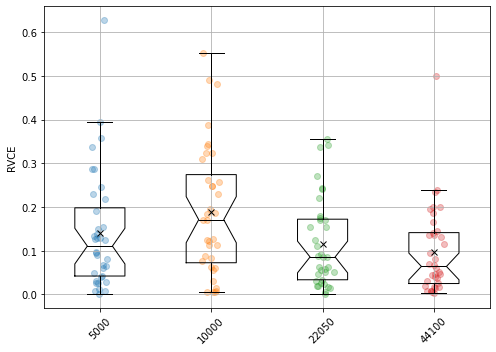

In [4]:
# sampling rate with resize
root_uuids = [
    ('031_RX100_resized_128_sr_5000', 'tst', 'rvce', '5000'), # sr 5000
    ('031_RX100_resized_128_sr_10000', 'tst', 'rvce', '10000'), # sr 10000
    ('031_RX100_resized_128_sr_22050', 'tst', 'rvce', '22050'), # sr 22050
    ('031_RX100_resized_128_sr_44100', 'tst', 'rvce', '44100'), # sr 44100
]
plot(root_uuids)
plt.savefig('plots/boxplots/sampling_rate_resize_boxplot.pdf')

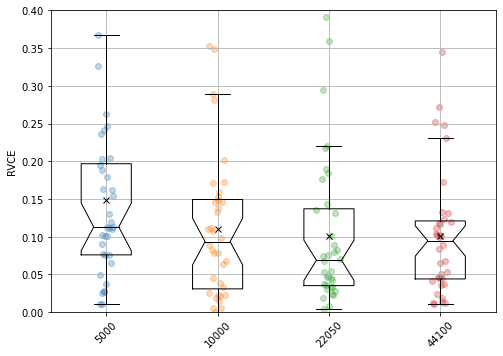

In [4]:
# sampling rate
root_uuids = [
    ('017_eyedea_RX100_sr_5000', 'tst', 'rvce', '5000'), # sr 5000
    ('017_eyedea_RX100_sr_10000', 'tst', 'rvce', '10000'), # sr 10000
    ('010_eyedea_RX100_3', 'tst', 'rvce', '22050'), # sr 22050
    ('017_eyedea_RX100_sr_44100', 'tst', 'rvce', '44100'), # sr 44100
]
plot(root_uuids)
plt.ylim(0, 0.4)
plt.savefig('plots/boxplots/sampling_rate_boxplot.pdf')

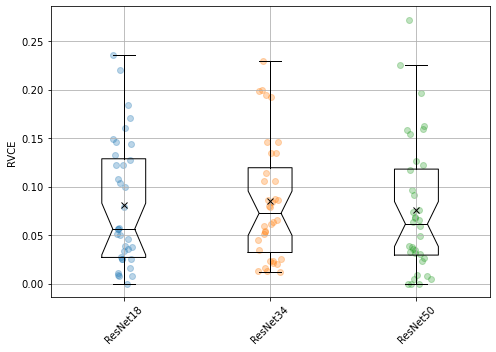

In [5]:
# architecture
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'ResNet18'),
    ('022_RX100_resized_128_ResNet34', 'tst', 'rvce', 'ResNet34'),
    ('022_RX100_resized_128_ResNet50', 'tst', 'rvce', 'ResNet50'),
    # ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/architecture_boxplot.pdf')

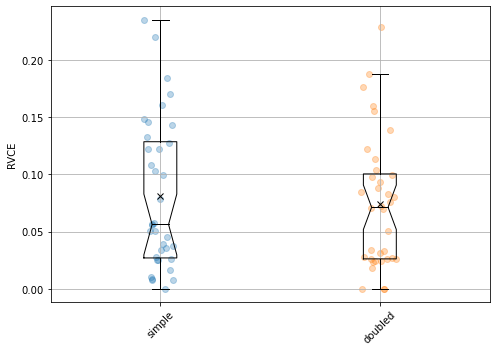

In [5]:
# doubled inference
root_uuids = [
    ('020_RX100_resized_128', 'tst', 'rvce', 'simple'),
    ('020_RX100_resized_128', 'tst_doubled', 'rvce', 'doubled'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/doubled_inference_boxplot.pdf')

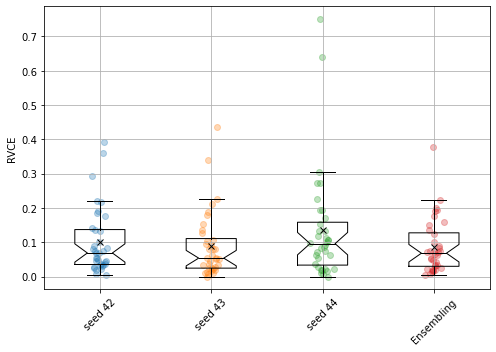

In [25]:
# seed
root_uuids = [
    ('010_eyedea_RX100_3', 'tst', 'rvce', 'seed 42'),
    ('018_eyedea_RX100_seed_43', 'tst', 'rvce', 'seed 43'),
    ('018_eyedea_RX100_seed_44', 'tst', 'rvce', 'seed 44'),
    ('000_ensembling', 'tst', 'rvce', 'Ensembling'),
]
plot(root_uuids)
plt.savefig('plots/boxplots/seed_boxplot.pdf')

(0.0, 0.45)

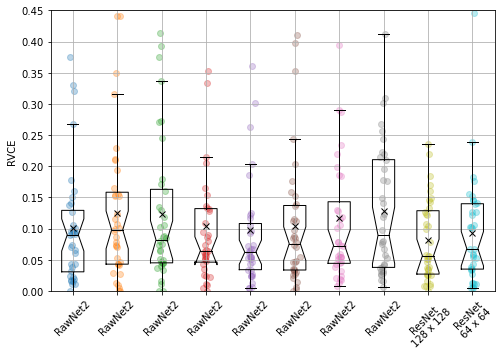

In [16]:
# seed
root_uuids = [
    ('016_RX100_RawNet2_1', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_2', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_3', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_4', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_5', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_6', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_7', 'tst', 'rvce', 'RawNet2'),
    ('016_RX100_RawNet2_8', 'tst', 'rvce', 'RawNet2'),
    ('020_RX100_resized_128', 'tst', 'rvce', 'ResNet\n128 x 128'),
    ('020_RX100_resized_64', 'tst', 'rvce', 'ResNet\n64 x 64'),

]
plot(root_uuids)
plt.ylim(0, 0.45)
# plt.savefig('plots/boxplots/raw_net2_boxplot.pdf')